# Dataset preparation and feature engineering

In [1]:
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo 
import plotly.express as px
import plotly.graph_objects as go
import statsmodels
from sklearn.preprocessing import LabelEncoder
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
# Ignore all warnings
warnings.filterwarnings('ignore')

In [ ]:
automobile = fetch_ucirepo(id=10) 
  
# data (as pandas dataframes) 
X = automobile.data.features 
Y = automobile.data.targets 
df = pd.concat([X, Y], axis=1)  # Concatenating along columns

In [ ]:
df.head()

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,symboling
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN,1
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0,2
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0,2


In [ ]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [ ]:
percent_nan = percent_missing(df)
percent_nan

peak-rpm              0.97561
horsepower            0.97561
num-of-doors          0.97561
price                 1.95122
stroke                1.95122
bore                  1.95122
normalized-losses    20.00000
dtype: float64

### Impute Rows with null

In [ ]:
df['price'] = df['price'].fillna(df.price.mean())
df['peak-rpm'] = df['peak-rpm'].fillna(df["peak-rpm"].mean())
df['horsepower'] = df['horsepower'].fillna(df["horsepower"].mean())
df['stroke'] = df['stroke'].fillna(df.stroke.mean())
df['bore'] = df['bore'].fillna(df.bore.mean())
df['num-of-doors'] = df['num-of-doors'].fillna(df["num-of-doors"].median())
df['normalized-losses']= df['normalized-losses'].fillna(df['normalized-losses'].mean())

In [ ]:
df.isnull().sum()

price                0
highway-mpg          0
city-mpg             0
peak-rpm             0
horsepower           0
compression-ratio    0
stroke               0
bore                 0
fuel-system          0
engine-size          0
num-of-cylinders     0
engine-type          0
curb-weight          0
height               0
width                0
length               0
wheel-base           0
engine-location      0
drive-wheels         0
body-style           0
num-of-doors         0
aspiration           0
fuel-type            0
make                 0
normalized-losses    0
symboling            0
dtype: int64

In [ ]:
#Convert string categorical columns

df = df.select_dtypes(include=[np.number]) 
df

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,engine-size,num-of-cylinders,curb-weight,height,width,length,wheel-base,num-of-doors,normalized-losses,symboling
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,130,4,2548,48.8,64.1,168.8,88.6,2.0,122.0,3
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,130,4,2548,48.8,64.1,168.8,88.6,2.0,122.0,3
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,152,6,2823,52.4,65.5,171.2,94.5,2.0,122.0,1
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,109,4,2337,54.3,66.2,176.6,99.8,4.0,164.0,2
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,136,5,2824,54.3,66.4,176.6,99.4,4.0,164.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,28,23,5400.0,114.0,9.5,3.15,3.78,141,4,2952,55.5,68.9,188.8,109.1,4.0,95.0,-1
201,19045.0,25,19,5300.0,160.0,8.7,3.15,3.78,141,4,3049,55.5,68.8,188.8,109.1,4.0,95.0,-1
202,21485.0,23,18,5500.0,134.0,8.8,2.87,3.58,173,6,3012,55.5,68.9,188.8,109.1,4.0,95.0,-1
203,22470.0,27,26,4800.0,106.0,23.0,3.40,3.01,145,6,3217,55.5,68.9,188.8,109.1,4.0,95.0,-1


# Data Exploration and Analysis

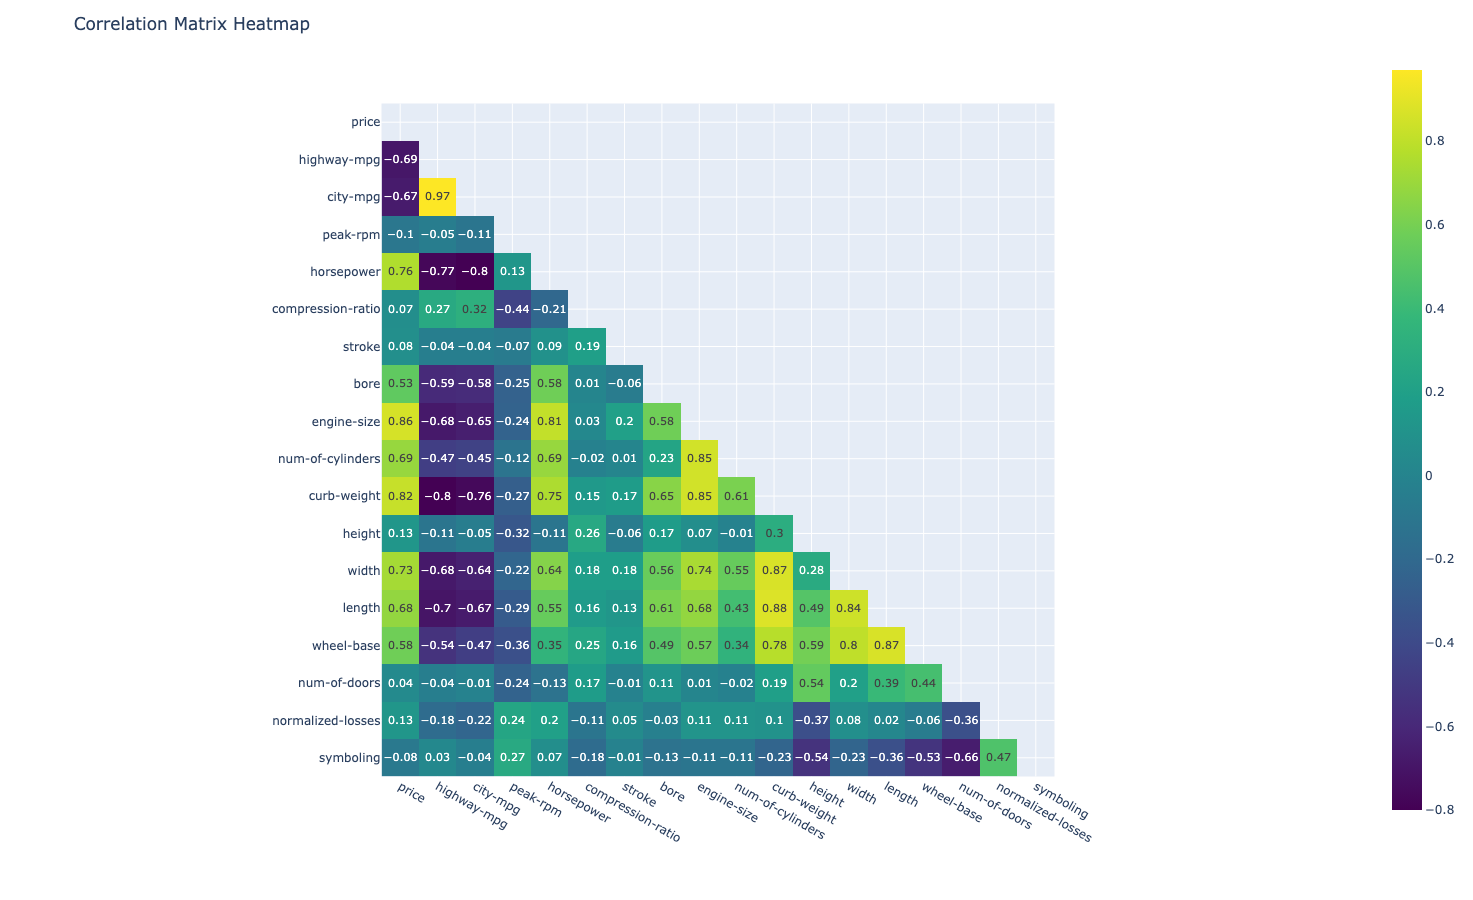

In [ ]:
# Assuming 'df' is already defined
# Step 1: Calculate the correlation matrix
df_corr = df.corr().round(2)

# Step 2: Create a mask for the upper triangle
mask = np.zeros_like(df_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Step 3: Apply the mask and set the upper triangle to NaN
df_corr_masked = df_corr.mask(mask)

# Step 4: Heatmap Visualization
fig = px.imshow(df_corr_masked, text_auto=True, color_continuous_scale='viridis')
fig.update_layout(height=900, width=900, title='Correlation Matrix Heatmap')
fig.show()

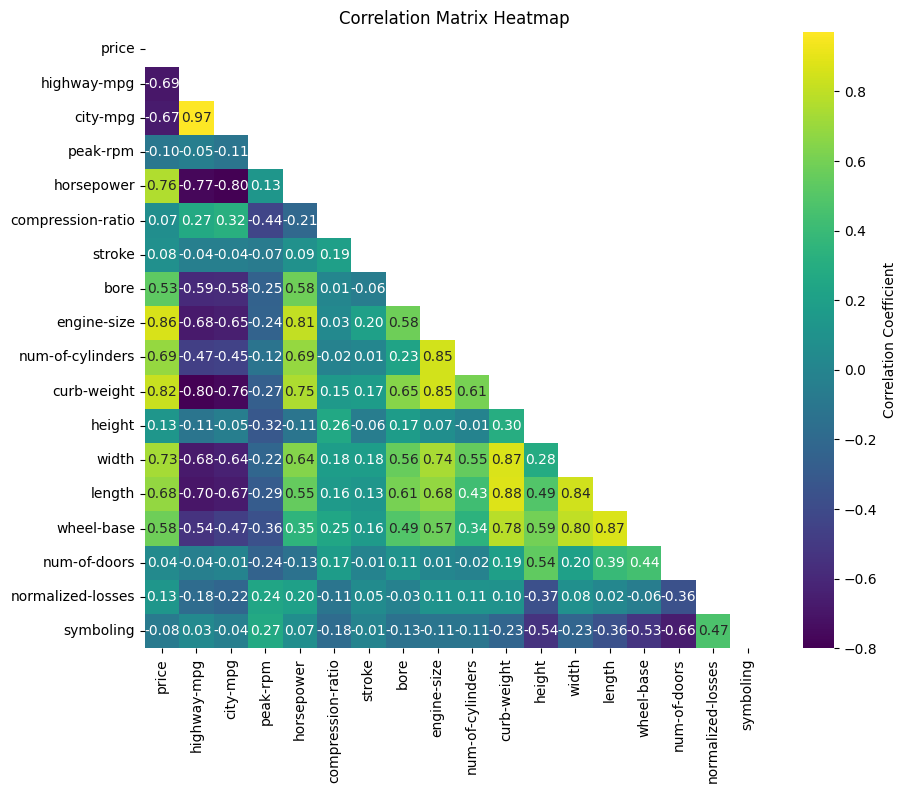

In [ ]:
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(df_corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_corr, mask=mask, annot=True, fmt=".2f", cmap='viridis', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix Heatmap')
plt.show()

### Top 5 Correlations

In [ ]:
# Step 2: Flatten the correlation matrix to a series and reset index
corr_series = df_corr.unstack()

# Step 3: Apply absolute value to consider both strong negative and positive correlations
corr_series = corr_series.abs().sort_values(ascending=False)

# Step 4: Remove self correlations (where pairs are the same)
corr_series = corr_series[corr_series.index.get_level_values(0) != corr_series.index.get_level_values(1)]

# Step 5: Select the top 5 unique correlations
top_5_correlations = corr_series.head(10)  # We need top 10 because it shows both (A, B) and (B, A) pairs
top_5_unique = top_5_correlations[::2]  # Skip every second element to avoid duplicate pairs

# Print the results
top_5_unique

highway-mpg  city-mpg       0.97
curb-weight  length         0.88
             width          0.87
wheel-base   length         0.87
price        engine-size    0.86
dtype: float64

### Top 15 correlations

In [ ]:
# Step 2: Flatten the correlation matrix to a series and reset index
corr_series = df_corr.unstack()

# Step 3: Apply absolute value to consider both strong negative and positive correlations
corr_series = corr_series.abs().sort_values(ascending=False)

# Step 4: Remove self correlations (where pairs are the same)
corr_series = corr_series[corr_series.index.get_level_values(0) != corr_series.index.get_level_values(1)]

# Step 5: Select the top 5 unique correlations
top_15_correlations = corr_series.head(40)  # We need top 10 because it shows both (A, B) and (B, A) pairs
top_15_unique = top_15_correlations[::2]  # Skip every second element to avoid duplicate pairs

# Print the results
top_15_unique

highway-mpg       city-mpg       0.97
curb-weight       length         0.88
                  width          0.87
wheel-base        length         0.87
price             engine-size    0.86
engine-size       curb-weight    0.85
num-of-cylinders  engine-size    0.85
length            width          0.84
price             curb-weight    0.82
engine-size       horsepower     0.81
curb-weight       highway-mpg    0.80
city-mpg          horsepower     0.80
horsepower        city-mpg       0.80
curb-weight       wheel-base     0.78
horsepower        highway-mpg    0.77
city-mpg          curb-weight    0.76
price             horsepower     0.76
curb-weight       horsepower     0.75
width             engine-size    0.74
                  price          0.73
dtype: float64

In [ ]:
# Features to drop (manually decide based on domain knowledge or other criteria)
features_to_drop = {'city-mpg','length','width','num-of-cylinders','curb-weight','normalized-losses'}

# Drop features from your DataFrame
df_dropped = df.drop(columns=features_to_drop)

# Display the DataFrame to verify the drop
df_dropped.head()

,price,highway-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,engine-size,height,wheel-base,num-of-doors,symboling
0,13495.0,27,5000.0,111.0,9.0,2.68,3.47,130,48.8,88.6,2.0,3
1,16500.0,27,5000.0,111.0,9.0,2.68,3.47,130,48.8,88.6,2.0,3
2,16500.0,26,5000.0,154.0,9.0,3.47,2.68,152,52.4,94.5,2.0,1
3,13950.0,30,5500.0,102.0,10.0,3.40,3.19,109,54.3,99.8,4.0,2
4,17450.0,22,5500.0,115.0,8.0,3.40,3.19,136,54.3,99.4,4.0,2


# Train | Test Split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
X = df_dropped.drop('symboling',axis=1)
y = df_dropped['symboling']

In [ ]:
X

,price,highway-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,engine-size,height,wheel-base,num-of-doors
0,13495.0,27,5000.0,111.0,9.0,2.68,3.47,130,48.8,88.6,2.0
1,16500.0,27,5000.0,111.0,9.0,2.68,3.47,130,48.8,88.6,2.0
2,16500.0,26,5000.0,154.0,9.0,3.47,2.68,152,52.4,94.5,2.0
3,13950.0,30,5500.0,102.0,10.0,3.40,3.19,109,54.3,99.8,4.0
4,17450.0,22,5500.0,115.0,8.0,3.40,3.19,136,54.3,99.4,4.0
...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,28,5400.0,114.0,9.5,3.15,3.78,141,55.5,109.1,4.0
201,19045.0,25,5300.0,160.0,8.7,3.15,3.78,141,55.5,109.1,4.0
202,21485.0,23,5500.0,134.0,8.8,2.87,3.58,173,55.5,109.1,4.0
203,22470.0,27,4800.0,106.0,23.0,3.40,3.01,145,55.5,109.1,4.0


### Scale and perform PC to show plot

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.1, random_state=42)

In [ ]:
scaler = StandardScaler()

In [ ]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=10)

In [ ]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
full_test = pd.concat([X_test,y_test],axis=1)

In [ ]:
len(full_test)


21

# Model Evaluation

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.42857142857142855

In [ ]:
confusion_matrix(y_test,y_pred)

array([[1, 0, 0, 1, 0],
       [0, 6, 1, 4, 0],
       [0, 1, 2, 1, 0],
       [0, 1, 1, 0, 0],
       [0, 2, 0, 0, 0]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       1.00      0.50      0.67         2
           0       0.60      0.55      0.57        11
           1       0.50      0.50      0.50         4
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2

    accuracy                           0.43        21
   macro avg       0.42      0.31      0.35        21
weighted avg       0.50      0.43      0.46        21



## Elbow Method for Choosing Reasonable K Values
### NOTE: This uses the test set for the hyperparameter selection of K.

In [ ]:
test_error_rates = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train,y_train) 
   
    y_pred_test = knn_model.predict(X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Value')

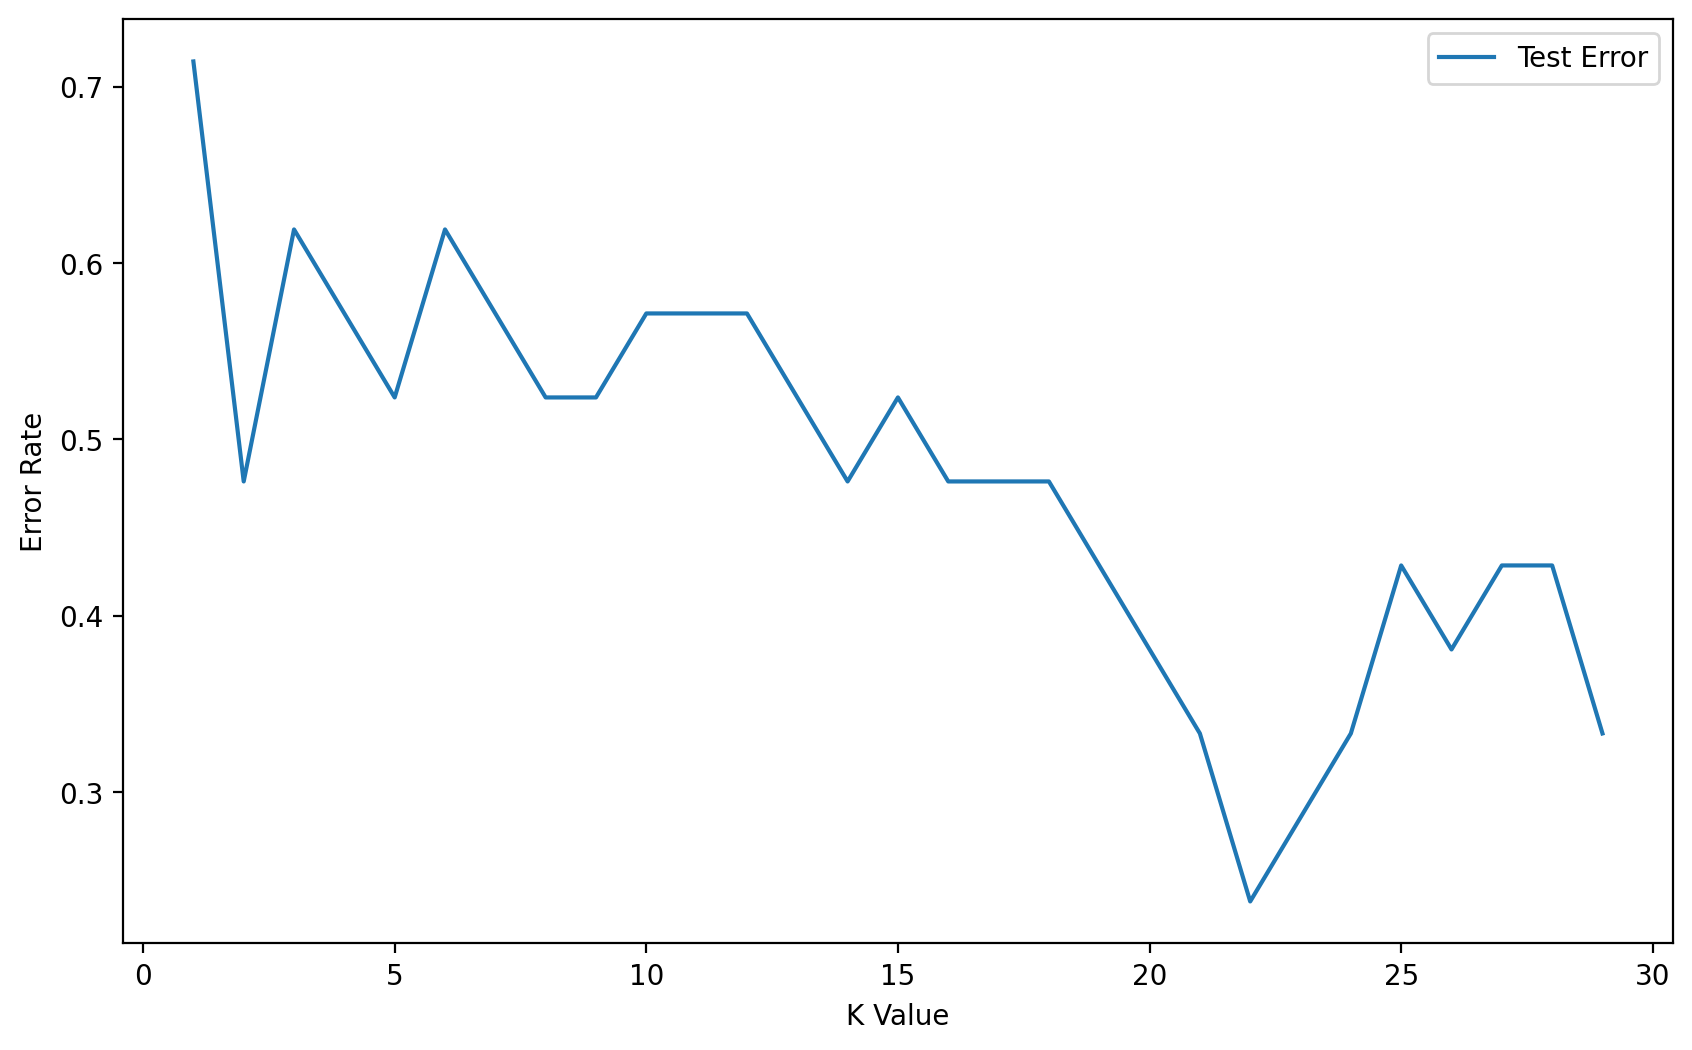

In [ ]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")


# Grid Search with pipeline

In [ ]:
scaler = StandardScaler()

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [ ]:
# Highly recommend string code matches variable name!
operations = [('scaler',scaler),('knn',knn)]

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
pipe = Pipeline(operations)

In [ ]:
k_values = list(range(1,31))

In [ ]:
k_values

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30]

In [ ]:
param_grid = {'knn__n_neighbors': k_values}

In [ ]:
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=3,scoring='accuracy')

In [ ]:
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29, 30]},
             scoring='accuracy')

In [ ]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [ ]:
full_cv_classifier.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_knn__n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [ ]:
len(k_values)

30

In [ ]:
full_cv_classifier.cv_results_['mean_test_score']

array([0.72263353, 0.61413714, 0.55429226, 0.55464481, 0.51639344,
       0.49982373, 0.51084082, 0.52185792, 0.52168165, 0.50546448,
       0.48915918, 0.54873964, 0.53816323, 0.50520007, 0.53243434,
       0.50520007, 0.5160409 , 0.50511193, 0.53772255, 0.51048828,
       0.49955932, 0.48334215, 0.47778953, 0.47232505, 0.49964745,
       0.47805394, 0.48880663, 0.47250132, 0.49409484, 0.49427111])

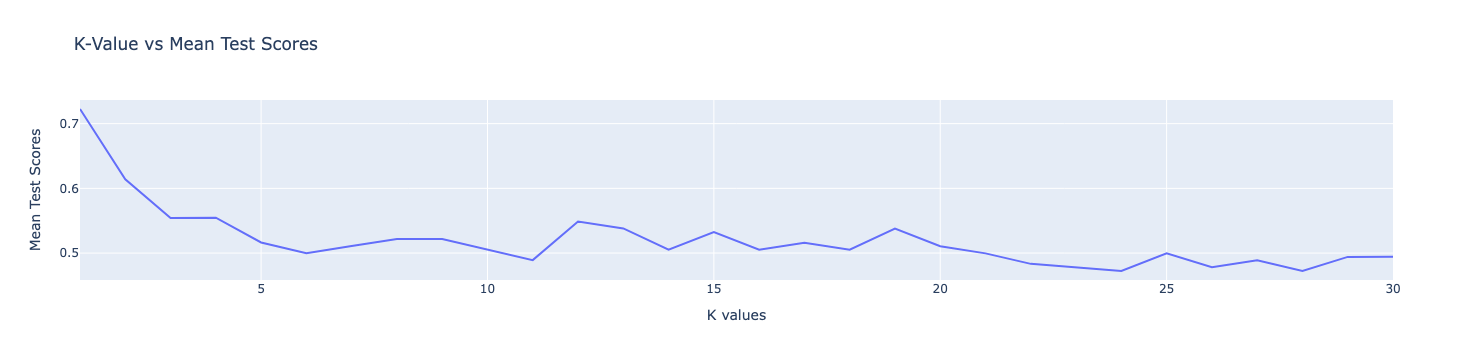

In [ ]:
# Extracting mean test scores
mean_test_scores = full_cv_classifier.cv_results_['mean_test_score']

# Correct the syntax for the labels parameter and create the plot
fig = px.line(
    x=k_values, 
    y=mean_test_scores, 
    labels={'x': 'K values', 'y': 'Mean Test Scores'},  # Corrected labels
    title="K-Value vs Mean Test Scores"
)

# Show the plot
fig.show()

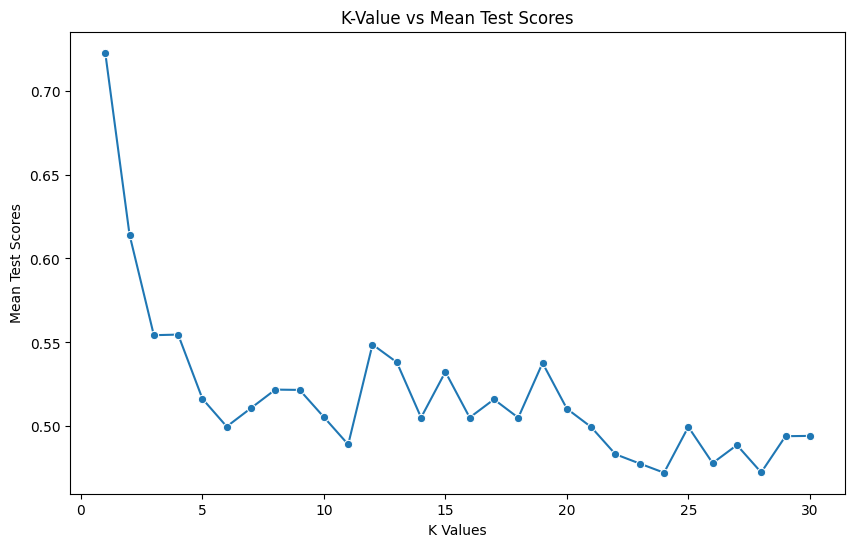

In [ ]:
# Assuming 'k_values' and 'mean_test_scores' are already defined
plt.figure(figsize=(10, 6))
sns.lineplot(x=k_values, y=mean_test_scores, marker='o')  # Using Seaborn for the line plot
plt.title('K-Value vs Mean Test Scores')
plt.xlabel('K Values')
plt.ylabel('Mean Test Scores')
plt.show()

# Final Model

In [ ]:
scaler = StandardScaler()
knn1 = KNeighborsClassifier(n_neighbors=1)
operations = [('scaler',scaler),('knn1',knn1)]

In [ ]:
pipe = Pipeline(operations)

In [ ]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn1', KNeighborsClassifier(n_neighbors=1))])

In [ ]:
pipe_pred = pipe.predict(X_test)

In [ ]:
accuracy_score(y_test,pipe_pred)

0.7142857142857143

In [ ]:
print(classification_report(y_test,pipe_pred))

              precision    recall  f1-score   support

          -2       0.00      0.00      0.00         0
          -1       1.00      1.00      1.00         2
           0       1.00      0.64      0.78        11
           1       0.60      0.75      0.67         4
           2       0.25      0.50      0.33         2
           3       1.00      1.00      1.00         2

    accuracy                           0.71        21
   macro avg       0.64      0.65      0.63        21
weighted avg       0.85      0.71      0.76        21



In [ ]:
single_sample = X_test.iloc[4]
single_sample

price                28248.00
highway-mpg             25.00
peak-rpm              4350.00
horsepower             123.00
compression-ratio       21.50
stroke                   3.64
bore                     3.58
engine-size            183.00
height                  58.70
wheel-base             110.00
num-of-doors             4.00
Name: 68, dtype: float64

In [ ]:
pipe.predict(single_sample.values.reshape(1, -1))

array([-1])

In [ ]:
pipe.predict_proba(single_sample.values.reshape(1, -1))


array([[0., 1., 0., 0., 0., 0.]])